In [1]:
import os
import numpy as np

import keras
import keras_metrics as km
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

import sys
import random
import pandas as pd
import csv
import xlrd

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

In [2]:
trainingData = pd.read_csv("C:/Users/eric/Desktop/ML/OHW/adult.data")
trainingData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Listing of attributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
testingData = pd.read_csv("C:/Users/eric/Desktop/ML/OHW/adult.test")
testingData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Listing of attributes
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
trainingData=trainingData.dropna()
testingData=testingData.dropna()

In [5]:
labelencoder = LabelEncoder()

trainingData[' workclass'] = labelencoder.fit_transform(trainingData[' workclass'])
trainingData[' education'] = labelencoder.fit_transform(trainingData[' education'])
trainingData[' marital-status'] = labelencoder.fit_transform(trainingData[' marital-status'])
trainingData[' occupation'] = labelencoder.fit_transform(trainingData[' occupation'])
trainingData[' relationship'] = labelencoder.fit_transform(trainingData[' relationship'])
trainingData[' race'] = labelencoder.fit_transform(trainingData[' race'])
trainingData[' sex'] = labelencoder.fit_transform(trainingData[' sex'])
trainingData[' native-country'] = labelencoder.fit_transform(trainingData[' native-country'])
trainingData[' Listing of attributes'] = labelencoder.fit_transform(trainingData[' Listing of attributes'])
trainingData.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Listing of attributes
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [6]:
testingData[' workclass'] = labelencoder.fit_transform(testingData[' workclass'])
testingData[' education'] = labelencoder.fit_transform(testingData[' education'])
testingData[' marital-status'] = labelencoder.fit_transform(testingData[' marital-status'])
testingData[' occupation'] = labelencoder.fit_transform(testingData[' occupation'])
testingData[' relationship'] = labelencoder.fit_transform(testingData[' relationship'])
testingData[' race'] = labelencoder.fit_transform(testingData[' race'])
testingData[' sex'] = labelencoder.fit_transform(testingData[' sex'])
testingData[' native-country'] = labelencoder.fit_transform(testingData[' native-country'])
testingData[' Listing of attributes'] = labelencoder.fit_transform(testingData[' Listing of attributes'])

testingData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Listing of attributes
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


In [20]:
target = [' education']
train_Label = trainingData[target]
train_next = trainingData.drop(target,axis=1)
test_Label = testingData[target]
test_next = testingData.drop(target,axis=1)

In [21]:
#進行資料正規化
min_max_scaler = preprocessing.MinMaxScaler()
train_next = min_max_scaler.fit_transform(trainingData)
train_Label = to_categorical(trainingData[' education'])
test_next = min_max_scaler.fit_transform(testingData)
test_Label = to_categorical(testingData[' education'])
train_Label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
from keras import regularizers
model = Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_shape=(train_next.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(train_Label.shape[1],kernel_initializer='uniform',activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',f1_m,precision_m, recall_m])

In [25]:
train_history = model.fit(x=train_next,y=train_Label,validation_split=0.1,epochs=30,batch_size=512,verbose=0)

In [26]:
loss, accuracy, firstscore, precision, recall = model.evaluate(test_next, test_Label, verbose=0)
print(loss, accuracy, firstscore, precision, recall)

0.5583412647247314 0.8529574275016785 0.8489315509796143 0.9544736742973328 0.7667706608772278


In [27]:
import matplotlib.pyplot as plt
def showtrain(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

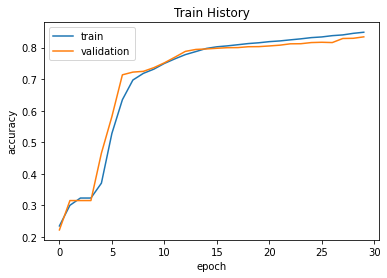

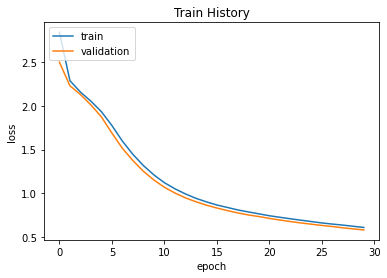

In [28]:
showtrain(train_history,'accuracy','val_accuracy')
showtrain(train_history,'loss','val_loss')